# Esercitazione 10
**7  Maggio 2024**

### APPUNTI
- Prendiamo un insieme di coppie di valori (xi,yi) con i=0,...,n-1
- Vogliamo determinare il polinomio Pn(xi)=yi con i=0,...,m-1 (con m>n)
   - Pn(x) = a0 + a1*x + ... + an*x^m
   - r(x) = (||Aa - y||2)^2
   - a* = argmin(r(x)) = argmin((||Aa - y||2)^2)
- Una volta che abbiamo determinato a*, abbiamo in mano tutti gli strumenti per definire il polinomio Pn(x)
- Abbiamo in mano anche gli strumenti che ci permettono di determinare la retta ai minimi quadrati P1(x) = a0 + a1*x

#### EQUAZIONI NORMALI
- Sotto l'ipotesi che la matrice sia a rango massimo e che A sia ben condizionata, allora:
    - (A^T)*A*a = (A^T)*y

In [2]:
import numpy as np
import scipy.linalg as spl
import SolveTriangular
import matplotlib.pyplot as plt

# ---------------------------------------------------------------

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [3]:
# FUNZIONE CHE IMPLEMENTA IL METODO DELLE EQUAZIONI NORMALI:
def eqnorm(A,b):
    
    # Trovo la matrice G(n*n) ottenuta come prodotto delle matrici A.T(n*m) * A(m*n):
    G = A.T@A
    print("Matrice G generata:\n",G)
    
    # Calcolo il condizionamento della matrice G appena calcolata:
    condG = np.linalg.cond(G)
    print("Il condizionamento della matrice trasposta di A vale:\n", condG)
    
    # Stampo il rango della matrice e il determinante, per vedere se è definita positiva:
    print("Il rango della matrice G è:\n", np.linalg.matrix_rank(G))
    print("Il determinante della matrice vale:\n", np.linalg.det(G))
    
    # Calcolo il nuovo termine noto (risultante dalla fattorizzazione della matrice):
    f = A.T@b
    
    # Risolvo il sistema ottenuto con il metodo di Cholesky (dato che G è quadrata, simmetrica, definita positiva e con rango massimo)
    # Trovo la matrice L di decomposizione della matrice G:
    L = spl.cholesky(G, lower = True)
    # Calcolo la soluzione della prima equazione del sistema ottenuto grazie alla decomposizione di Cholesky (L*y = f):
    y, flag = SolveTriangular.Lsolve(L,f)
    # Se il flag è uguale a 0, calcolo la soluzione della seconda equazione del sistema ottenuto mediante Cholesky (L.T*x = y):
    if flag == 0:
        # Calcolo la soluzione 
        x, flag = SolveTriangular.Usolve(L.T,y)
    return x

# ---------------------------------------------------------------

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [5]:
# FUNZIONE CHE IMPLEMENTA IL METODO QR:
def qrLS(A,b):
    
    # Calcolo la dimensione n della matrice A(m*n) e stampo la matrice: 
    n = A.shape[1]
    print("La matrice di partenza A è:\n",A)
    
    # Trovo le matrici Q(m*m) ed R(m*n), ottenute per fattorizzazione della matrice A mediante il metodo QR:
    Q,R = spl.qr(A)
    print("La matrice Q della fattorizzazione vale:\n",Q)
    print("La matrice R della fattorizzazione vale:\n",R)
    
    # Isolo la matrice R1(n*n), ovvero la componente quadrata della matrice R:
    R1 = R[0:n, 0:n]
    
    # Calcolo il condizionamento della matrice R1 appena calcolata e lo stampo:
    condR1 = np.linalg.cond(R1)
    print("Il condizionamento della matrice R1 vale:\n", condR1)
    
    # Calcolo il nuovo vettore dei termini noti h, ottenuto come prodotto Q.T*b:
    h = Q.T@b
    
    # Isolo i primi n valori del vettore dei termini noti, salvandoli in un vettore h1:
    h1 = h[0:n]
    
    # Calcolo la soluzione del sistema fattorizzato R1*x = h1:
    x, flag = SolveTriangular.Usolve(R1, h1)
    
    # Calcolo il residuo, ottenuto come R*x - h:
    r = R@x - h
    # Calcolo il quadrato della norma 2 del residuo:
    quadrato_norma_2 = np.linalg.norm(r,2)**2
    
    return x, quadrato_norma_2

# ---------------------------------------------------------------

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [11]:
# FUNZIONE CHE IMPLEMENTA IL MEOTODO SVD:
def svdLS(A,b):
    
    # Calcolo i valori m ed n della matrice A(m*n):
    m,n = A.shape
    
    # Trovo i valori utilizzati per la fattorizzazione di A tramite il metodo SVD:
    # --> "U" e "VT" sono due matrici
    # --> "s" è il vettore dei valori singolari calcolati (corrispondono agli elementi della matrice diagonale Sommatoria)
    U,s,VT = spl.svd(A)
    
    # Test di stampa della matrice Sommatoria generata dai valori singolari ottenuti:
    print("La matrice diagonale generata da U.T*A*V (ovvero la matrice \"sommatoria\")\n", np.diag(s))
    
    # Calcolo la matrice V originale, facendo la trasposta di VT:
    V = VT.T
    
    # Calcolo il valore minimo thresh, grazie al quale riuscirò a trovare tutti i valori singolari effettivi in s:
    # Sto inizializzando un valore di soglia che mi rappresenta il circa 0, dovuto ai possibili errori nei calcoli
    thresh = np.spacing(1)*m*s[0]
    # Calcolo i valori singolari effettivi in s (che devono essere diversi da zero, e maggiori della quantità calcolata precedentemente):
    k = np.count_nonzero(s>thresh)
    
    # Calcolo il nuovo vettore dei termini noti, come U.T*b:
    d = U.T@b
    
    # Isolo i primi k valori del termine noto (facendo il reshape per generare un vettore colonna):
    d1 = d[:k].reshape(k,1)
    # Isolo i primi k valori del vettore contenente i valori singolari della matrice Sommatoria (come prima, facendo il reshape):
    s1 = s[:k].reshape(k,1)
    
    # Calcolo la soluzione esatta del nuovo sistema ottenuto per fattorizzazione, calcolata come d1/s1:
    c = d1/s1
    
    # Calcolo il valore della soluzione esatta del sistema iniziale, ottenibile tramite la moltiplicazione V*c (dove di V dovranno essere
    # presi solamente gli elementi tali da favorire la moltiplicazione, ovvero facendo in modo che sia "V.shape[1] = k":
    x = V[:,:k]@c
    
    # Calcolo il residuo (ovvero gli errori che abbiamo commesso) andando a prendere la componente restante (quindi da k in poi)
    # del nuovo vettore dei termini noti calcolato:
    r = d[k:] 
    # Calcolo il quadrato della norma 2 del residuo:
    quadrato_norma_2 = np.linalg.norm(r)**2
    
    return x, quadrato_norma_2

# ---------------------------------------------------------------

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



### APPUNTI
- np.polyval() richiede dei coefficienti del polinomio da valutare (dal coefficiente con grado della x maggiore a quello minore):
    - Se il polinomio da valutare è a0 + a1*x, allora devo passare alla funzione il vettore flippato dei coefficienti, ovvero prima a1, poi a0

Matrice G generata:
 [[  9.      -2.8     46.14  ]
 [ -2.8     46.14   -33.712 ]
 [ 46.14   -33.712  380.6646]]
Il condizionamento della matrice trasposta di A vale:
 117.55812409925215
Il rango della matrice G è:
 3
Il determinante della matrice vale:
 55345.09470000003
Matrice G generata:
 [[  9.          -5.44        21.7794    ]
 [ -5.44        21.7794     -44.746144  ]
 [ 21.7794     -44.746144   143.05467618]]
Il condizionamento della matrice trasposta di A vale:
 34.84225965691326
Il rango della matrice G è:
 3
Il determinante della matrice vale:
 6059.496281064546
Matrice G generata:
 [[8.         8.017      8.0340519 ]
 [8.017      8.0340519  8.0511559 ]
 [8.0340519  8.0511559  8.06831222]]
Il condizionamento della matrice trasposta di A vale:
 19889696331848.113
Il rango della matrice G è:
 3
Il determinante della matrice vale:
 9.23215068053105e-16
La matrice di partenza A è:
 [[ 1.   -3.5  12.25]
 [ 1.   -3.    9.  ]
 [ 1.   -2.    4.  ]
 [ 1.   -1.5   2.25]
 [ 1.   -0.5   

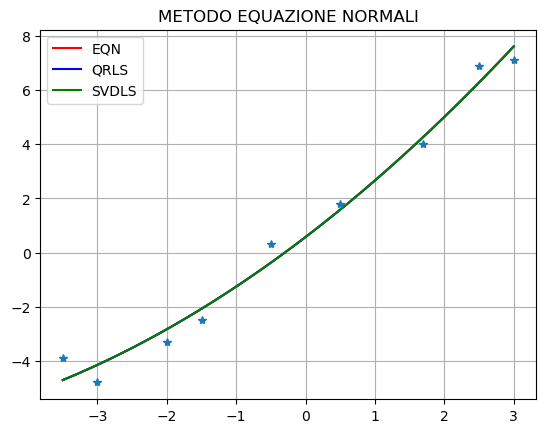

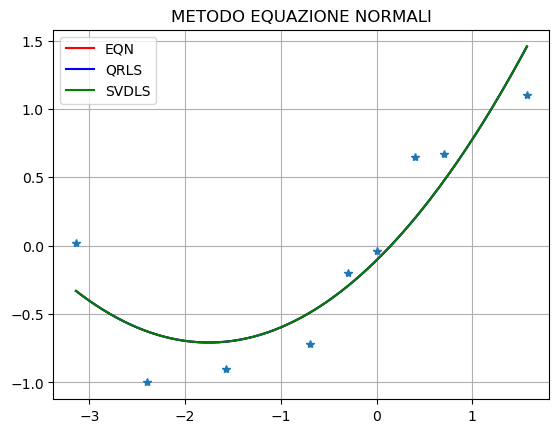

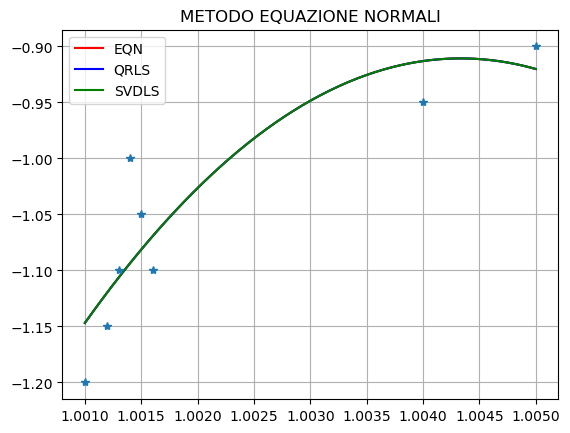

In [50]:
# grado del polinomio da generare
n = 2
# numero dei coefficienti del nostro polinomio
n1 = n + 1

# ------ IMPOSTAZIONE DEI DATI (1) -------:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
m = x.shape[0]
# se non mettessi [:,:n1] allora mi verrebbe restituita una matrice m*m
A = np.vander(x, increasing=True)[:,:n1]

# ------ IMPOSTAZIONE DEI DATI (2) -------:
𝑥2 = np.array([-3.14,-2.4,-1.57,-0.7,-0.3,0,0.4,0.7,1.57])
𝑦2 = np.array([0.02,-1,-0.9,-0.72,-0.2,-0.04,0.65,0.67,1.1])
m2 = x2.shape[0]
# se non mettessi [:,:n1] allora mi verrebbe restituita una matrice m*m
A2 = np.vander(x2, increasing=True)[:,:n1]

# ------ IMPOSTAZIONE DEI DATI (3) -------:
𝑥3 = np.array([1.001,1.004,1.005,1.0012,1.0013,1.0014,1.0015,1.0016])
𝑦3 = np.array([-1.2,-0.95,-0.9,-1.15,-1.1,-1, -1.05, -1.1])
m3 = x3.shape[0]
# se non mettessi [:,:n1] allora mi verrebbe restituita una matrice m*m
A3 = np.vander(x3, increasing=True)[:,:n1]

xv = np.linspace(np.min(x), np.max(x), 200)
xv2 = np.linspace(np.min(x2), np.max(x2), 200)
xv3 = np.linspace(np.min(x3), np.max(x3), 200)

# METODO EQUAZIONI NORMALI:
a_EQN = eqnorm(A,y)
a_EQN2 = eqnorm(A2,y2)
a_EQN3 = eqnorm(A3,y3)
# valuto il polinomio generato
pol_EQN = np.polyval(np.flip(a_EQN), xv)
pol_EQN2 = np.polyval(np.flip(a_EQN2), xv2)
pol_EQN3 = np.polyval(np.flip(a_EQN3), xv3)

# METODO QRLS:
a_QRLS, qn2_QRLS = qrLS(A,y)
a_QRLS2, qn2_QRLS2 = qrLS(A2,y2)
a_QRLS3, qn2_QRLS3 = qrLS(A3,y3)
# valuto il polinomio generato
pol_QRLS = np.polyval(np.flip(a_QRLS), xv)
pol_QRLS2 = np.polyval(np.flip(a_QRLS2), xv2)
pol_QRLS3 = np.polyval(np.flip(a_QRLS3), xv3)

# METODO SVDLS:
a_SVDLS, qn2_SVDLS = svdLS(A,y)
a_SVDLS2, qn2_SVDLS2 = svdLS(A2,y2)
a_SVDLS3, qn2_SVDLS3 = svdLS(A3,y3)
# valuto il polinomio generato
pol_SVDLS = np.polyval(np.flip(a_SVDLS), xv)
pol_SVDLS2 = np.polyval(np.flip(a_SVDLS2), xv2)
pol_SVDLS3 = np.polyval(np.flip(a_SVDLS3), xv3)

# STAMPA DEI GRAFICI:
plt.plot(xv, pol_EQN, 'r')
plt.plot(xv, pol_QRLS, 'b')
plt.plot(xv, pol_SVDLS, 'g')
plt.plot(x,y,'*')
plt.title("METODO EQUAZIONE NORMALI")
plt.legend(("EQN", "QRLS", "SVDLS"))
plt.grid(True)
plt.show()
plt.plot(xv2, pol_EQN2, 'r')
plt.plot(xv2, pol_QRLS2, 'b')
plt.plot(xv2, pol_SVDLS2, 'g')
plt.plot(x2,y2,'*')
plt.title("METODO EQUAZIONE NORMALI")
plt.legend(("EQN", "QRLS", "SVDLS"))
plt.grid(True)
plt.show()
plt.plot(xv3, pol_EQN3, 'r')
plt.plot(xv3, pol_QRLS3, 'b')
plt.plot(xv3, pol_SVDLS3, 'g')
plt.plot(x3,y3,'*')
plt.title("METODO EQUAZIONE NORMALI")
plt.legend(("EQN", "QRLS", "SVDLS"))
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



Matrice Aa:
 [[1.0000e+00 4.0000e-04]
 [1.0000e+00 2.5070e-01]
 [1.0000e+00 5.0080e-01]
 [1.0000e+00 2.0007e+00]
 [1.0000e+00 8.0013e+00]]
Matrice Ab:
 [[1.00000000e+00 4.00000000e-04 1.60000000e-07]
 [1.00000000e+00 2.50700000e-01 6.28504900e-02]
 [1.00000000e+00 5.00800000e-01 2.50800640e-01]
 [1.00000000e+00 2.00070000e+00 4.00280049e+00]
 [1.00000000e+00 8.00130000e+00 6.40208017e+01]]
Il condizionamento della matrice Aa vale:
 4.663457775986457
La matrice è ben condizionata!
Il condizionamento della matrice Ab vale:
 65.6749352562479
La matrice è mal condizionata!
Matrice G generata:
 [[ 5.         10.7539    ]
 [10.7539     68.33725347]]
Il condizionamento della matrice trasposta di A vale:
 21.747838428408542
Il rango della matrice G è:
 2
Il determinante della matrice vale:
 226.03990213999998
La matrice diagonale generata da U.T*A*V (ovvero la matrice "sommatoria")
 [[8.37337039 0.        ]
 [0.         1.79552829]]
La matrice diagonale generata da U.T*A*V (ovvero la matrice "

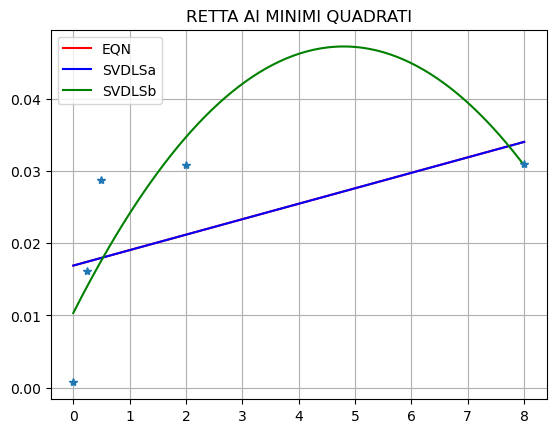

In [49]:
na = 1
n1a = na+1
nb = 2
n1b = nb+1
𝑥 = np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
𝑦 = np.array([0.0007,0.0162,0.0288,0.0309,0.0310])
m = x.shape[0]
# Aa è una matrice ben condizionata, mentre Ab è considerata mal condizionata
Aa = np.vander(x, increasing=True)[:,:n1a]
Ab = np.vander(x, increasing=True)[:,:n1b]

print("Matrice Aa:\n", Aa)
print("Matrice Ab:\n", Ab)

print("Il condizionamento della matrice Aa vale:\n", np.linalg.cond(Aa))
if np.linalg.cond(Aa) < 10:
    print("La matrice è ben condizionata!")
else:
    print("La matrice è mal condizionata!")
print("Il condizionamento della matrice Ab vale:\n", np.linalg.cond(Ab))
if np.linalg.cond(Ab) < 10:
    print("La matrice è ben condizionata!")
else:
    print("La matrice è mal condizionata!")

xv = np.linspace(np.min(x), np.max(x), 200)
a_EQN = eqnorm(Aa,y)
a_SVDLSa, qn2_SVDLSa = svdLS(Aa,y)
a_SVDLSb, qn2_SVDLSb = svdLS(Ab,y)
pol_EQN = np.polyval(np.flip(a_EQN), xv)
pol_SVDLSa = np.polyval(np.flip(a_SVDLSa), xv)
pol_SVDLSb = np.polyval(np.flip(a_SVDLSb), xv)

print("La differenza fra il quadrato della norma 2 nel caso n=1 e di quella nel caso n=2 vale:\n", qn2_SVDLSa - qn2_SVDLSb)

plt.plot(xv, pol_EQN, 'r')
plt.plot(xv, pol_SVDLSa, 'b')
plt.plot(xv, pol_SVDLSb, 'g')
plt.plot(x,y,'*')
plt.title("RETTA AI MINIMI QUADRATI")
plt.legend(("EQN","SVDLSa","SVDLSb"))
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



Matrice G generata:
 [[6.00000000e+00 6.15000000e+01 6.30550000e+02 6.46672500e+03]
 [6.15000000e+01 6.30550000e+02 6.46672500e+03 6.63390979e+04]
 [6.30550000e+02 6.46672500e+03 6.63390979e+04 6.80729939e+05]
 [6.46672500e+03 6.63390979e+04 6.80729939e+05 6.98714953e+06]]
Il condizionamento della matrice trasposta di A vale:
 1.3337855831202832e+17
Il rango della matrice G è:
 3
Il determinante della matrice vale:
 2.5409483340559567e-07
La matrice di partenza A è:
 [[1.000000e+00 1.000000e+01 1.000000e+02 1.000000e+03]
 [1.000000e+00 1.010000e+01 1.020100e+02 1.030301e+03]
 [1.000000e+00 1.020000e+01 1.040400e+02 1.061208e+03]
 [1.000000e+00 1.030000e+01 1.060900e+02 1.092727e+03]
 [1.000000e+00 1.040000e+01 1.081600e+02 1.124864e+03]
 [1.000000e+00 1.050000e+01 1.102500e+02 1.157625e+03]]
La matrice Q della fattorizzazione vale:
 [[-0.40824829 -0.5976143   0.54554473 -0.372678   -0.17325475 -0.09831241]
 [-0.40824829 -0.35856858 -0.10910895  0.52174919  0.49542776  0.41855257]
 [-0.

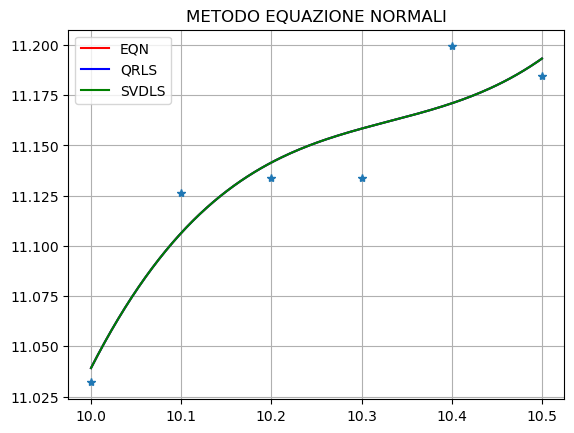

Matrice G generata:
 [[6.00000000e+00 6.15130000e+01 6.30812769e+02 6.47070851e+03]
 [6.15130000e+01 6.30812769e+02 6.47070851e+03 6.63927771e+04]
 [6.30812769e+02 6.47070851e+03 6.63927771e+04 6.81408075e+05]
 [6.47070851e+03 6.63927771e+04 6.81408075e+05 6.99537383e+06]]
Il condizionamento della matrice trasposta di A vale:
 1.3101918593724138e+17
Il rango della matrice G è:
 3
Il determinante della matrice vale:
 2.570829364845539e-07
La matrice di partenza A è:
 [[1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03]
 [1.00000000e+00 1.01130000e+01 1.02272769e+02 1.03428451e+03]
 [1.00000000e+00 1.02000000e+01 1.04040000e+02 1.06120800e+03]
 [1.00000000e+00 1.03000000e+01 1.06090000e+02 1.09272700e+03]
 [1.00000000e+00 1.04000000e+01 1.08160000e+02 1.12486400e+03]
 [1.00000000e+00 1.05000000e+01 1.10250000e+02 1.15762500e+03]]
La matrice Q della fattorizzazione vale:
 [[-0.40824829 -0.60937413  0.56163291 -0.34688888 -0.14453414 -0.07309564]
 [-0.40824829 -0.33630363 -0.1530

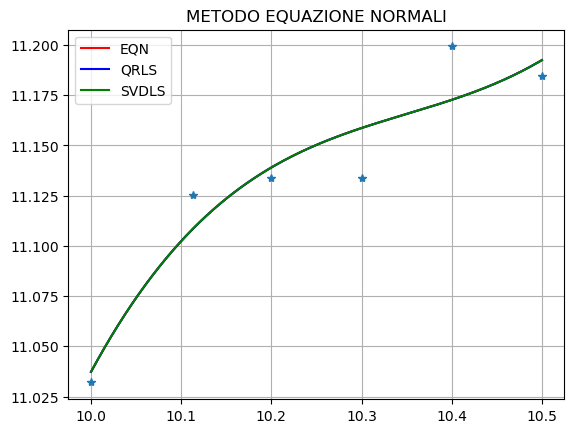

In [61]:
n = 3
n1 = n+1
𝑥 = np.arange(10.0,10.6,0.1)
𝑦 = np.array([11.0320,11.1263,11.1339,11.1339,11.1993,11.1844])
m = x.shape[0]
A = np.vander(x, increasing=True)[:,:n1]
xv = np.linspace(np.min(x), np.max(x), 200)

# METODO EQUAZIONI NORMALI:
a_EQN = eqnorm(A,y)
pol_EQN = np.polyval(np.flip(a_EQN), xv)

# METODO QRLS:
a_QRLS, qn2_QRLS = qrLS(A,y)
pol_QRLS = np.polyval(np.flip(a_QRLS), xv)

# METODO SVDLS:
a_SVDLS, qn2_SVDLS = svdLS(A,y)
pol_SVDLS = np.polyval(np.flip(a_SVDLS), xv)

# STAMPA DEI GRAFICI:
plt.plot(xv, pol_EQN, 'r')
plt.plot(xv, pol_QRLS, 'b')
plt.plot(xv, pol_SVDLS, 'g')
plt.plot(x,y,'*')
plt.title("METODO EQUAZIONE NORMALI")
plt.legend(("EQN", "QRLS", "SVDLS"))
plt.grid(True)
plt.show()

x[1] = x[1] + 0.013
y[1] = y[1] - 0.001

m = x.shape[0]
A = np.vander(x, increasing=True)[:,:n1]
xv = np.linspace(np.min(x), np.max(x), 200)

# METODO EQUAZIONI NORMALI:
a_EQN = eqnorm(A,y)
pol_EQN = np.polyval(np.flip(a_EQN), xv)

# METODO QRLS:
a_QRLS, qn2_QRLS = qrLS(A,y)
pol_QRLS = np.polyval(np.flip(a_QRLS), xv)

# METODO SVDLS:
a_SVDLS, qn2_SVDLS = svdLS(A,y)
pol_SVDLS = np.polyval(np.flip(a_SVDLS), xv)

# STAMPA DEI GRAFICI:
plt.plot(xv, pol_EQN, 'r')
plt.plot(xv, pol_QRLS, 'b')
plt.plot(xv, pol_SVDLS, 'g')
plt.plot(x,y,'*')
plt.title("METODO EQUAZIONE NORMALI")
plt.legend(("EQN", "QRLS", "SVDLS"))
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [99]:
x = np.array([1,2])
# restituisce i coefficienti di un polinomio che ha le radici specificate in x
p = np.poly(x)
print("Coefficienti del polinomio generato:", p)

Coefficienti del polinomio generato: [ 1. -3.  2.]


In [100]:
def pol_Lagrange(x,j):
    xj = np.zeros_like(x)
    n = x.size
    if j==0:
        xj = x[1:n]
    else:
        xj = np.append(x[0:j], x[j+1:n])
    num = np.poly(xj)
    den = np.polyval(num,x[j])
    p = num/den
    return p

In [101]:
# FUNZIONE CHE CALCOLA IL POLINOMIO INTERPOLATORE IN FORMA DI LAGRANGE:
def Interpl(x,y,xv):
    m = xv.size
    n = x.size
    
    L = np.zeros((m,n))
    for j in range(n):
        p = pol_Lagrange(x,j)
        L[:,j] = np.polyval(p,xv)
        
    return L@y

# ---------------------------------------------------------------

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

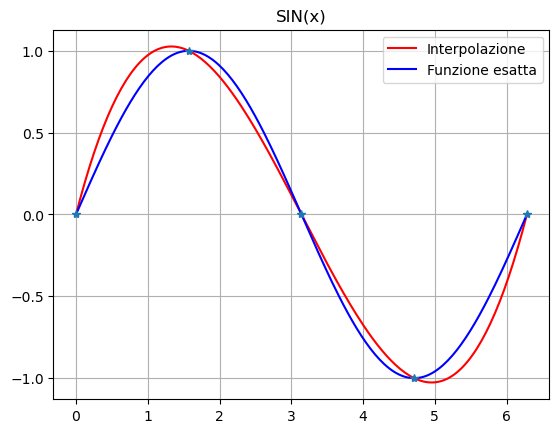

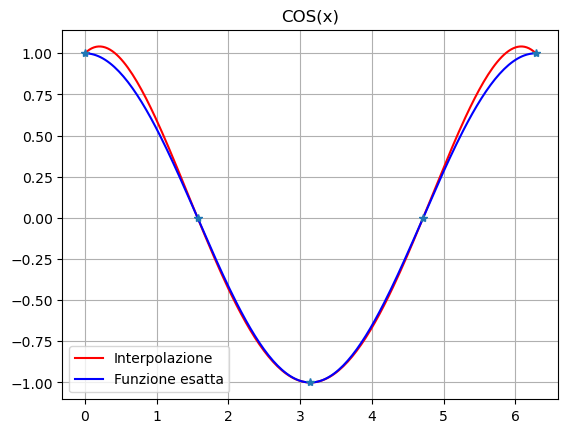

In [102]:
k_vet = np.array([0.0,1,2,3,4])
x_vet = []
for k in k_vet:
    xk = k*np.pi/2
    x_vet.append(xk)
x = np.array(x_vet)
f1 = lambda x: np.sin(x)
f2 = lambda x: np.cos(x)
y1 = f1(x)
y2 = f2(x)
xv = np.linspace(np.min(x), np.max(x), 200)

polLagrange1 = Interpl(x,y1,xv)
polLagrange2 = Interpl(x,y2,xv)

plt.plot(xv, polLagrange1, 'r', xv, f1(xv), 'b')
plt.plot(x,y1,'*')
plt.title("SIN(x)")
plt.legend(("Interpolazione", "Funzione esatta"))
plt.grid(True)
plt.show()
plt.plot(xv, polLagrange2, 'r', xv, f2(xv), 'b')
plt.plot(x,y2,'*')
plt.title("COS(x)")
plt.legend(("Interpolazione", "Funzione esatta"))
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

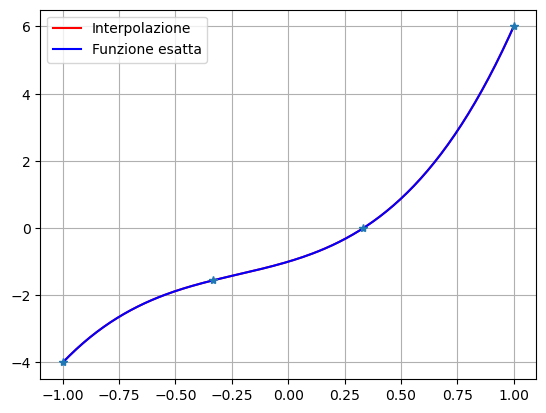

In [103]:
n = 3
x = np.linspace(-1,1,4)
f = lambda x: 3*x**3 + 2*x**2 + 2*x - 1
y = f(x)
xv = np.linspace(-1,1,200)
polLagrange = Interpl(x,y,xv)
plt.plot(xv, polLagrange, 'r', xv, f(xv), 'b')
plt.plot(x,y,'*')
plt.legend(("Interpolazione","Funzione esatta"))
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


I valori della temperatura alle latitudini +/- 42 valgono:
 [3.78369543 3.55228946]


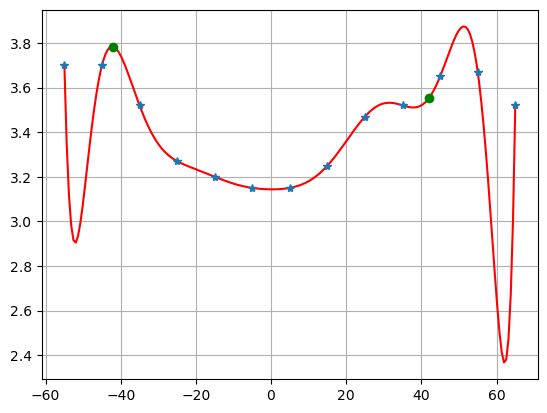

In [124]:
L = np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T = np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])
xv = np.linspace(-55,65,200)
xv_da_calcolare = np.array([-42,42])
polLagrange = Interpl(L,T,xv)
polLagrange_specifico = Interpl(L,T,xv_da_calcolare)
print("I valori della temperatura alle latitudini +/- 42 valgono:\n",polLagrange_specifico)
plt.plot(xv, polLagrange, 'r')
plt.plot(L,T,'*')
plt.plot(xv_da_calcolare, polLagrange_specifico, 'go')
plt.grid(True)
plt.show()

# ---------------------------------------------------------------

## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

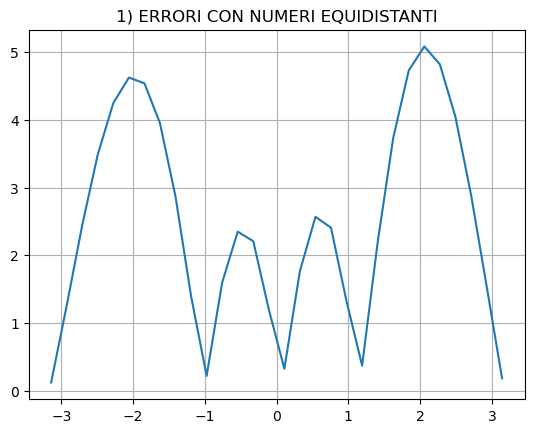

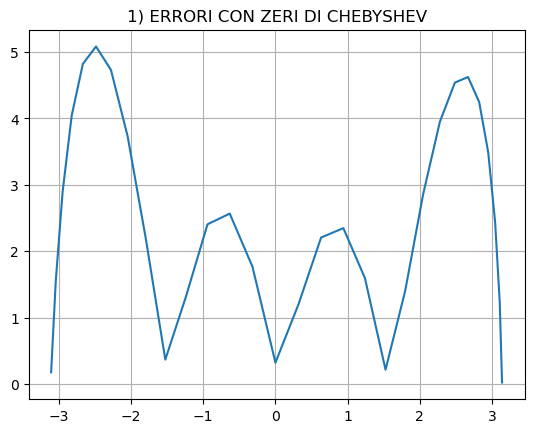

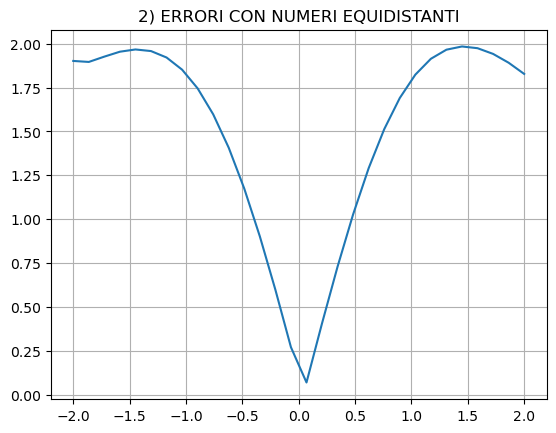

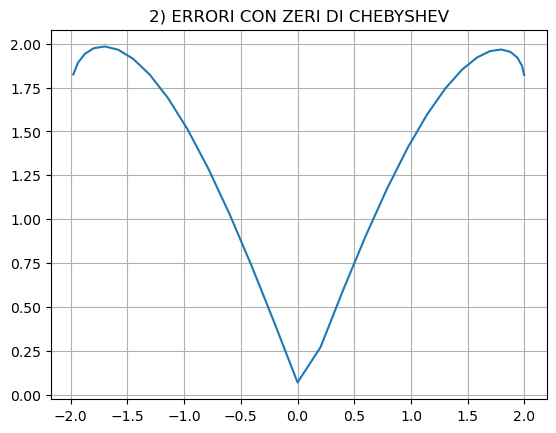

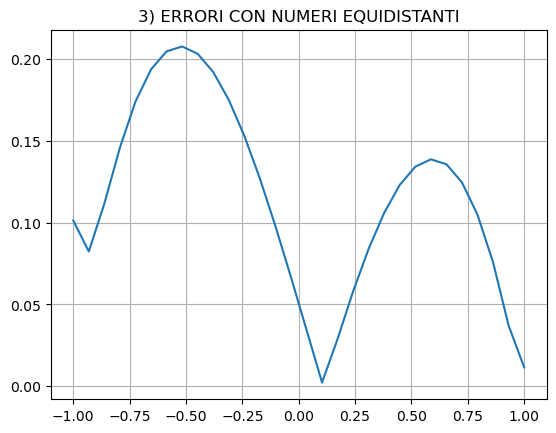

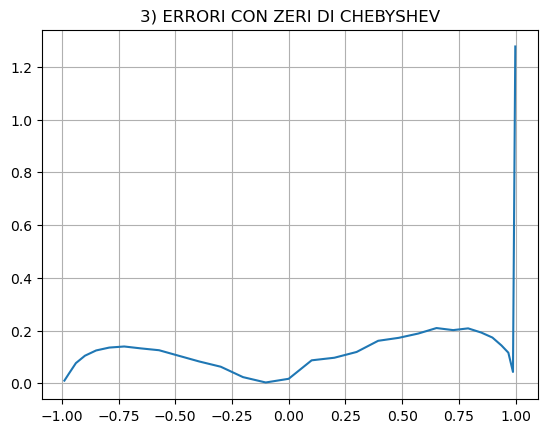

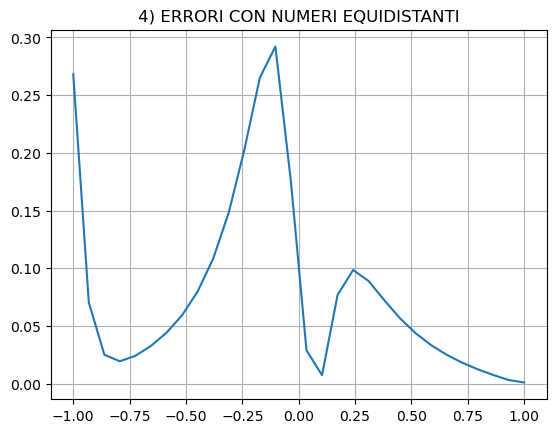

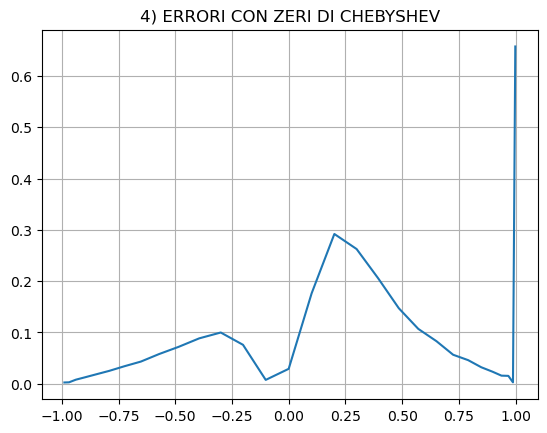

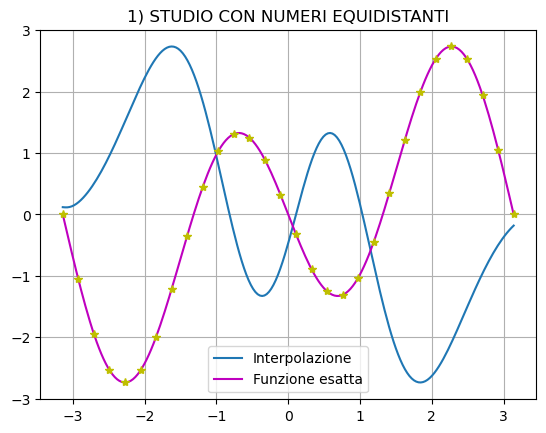

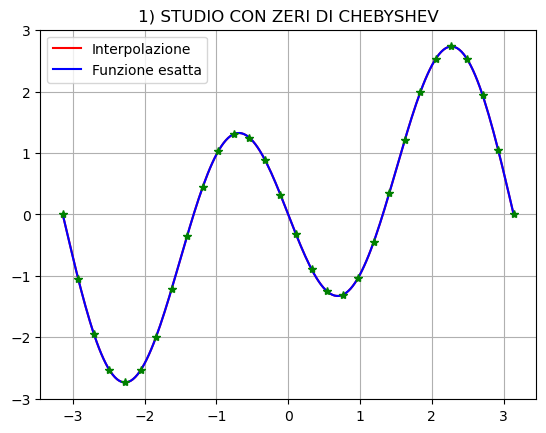

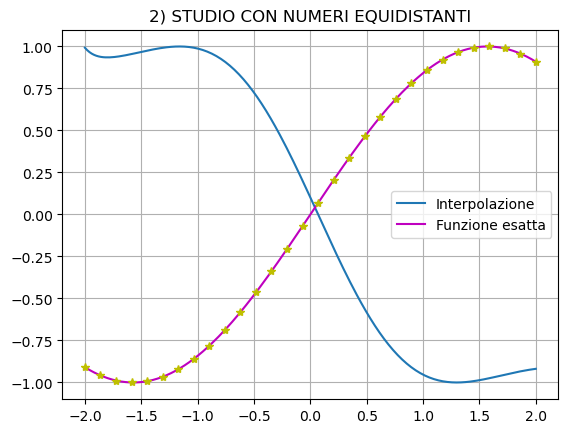

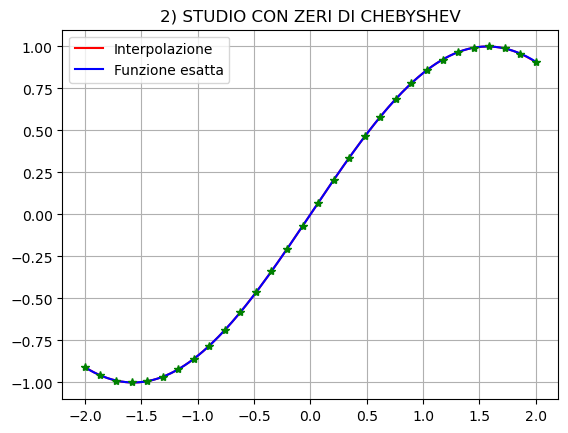

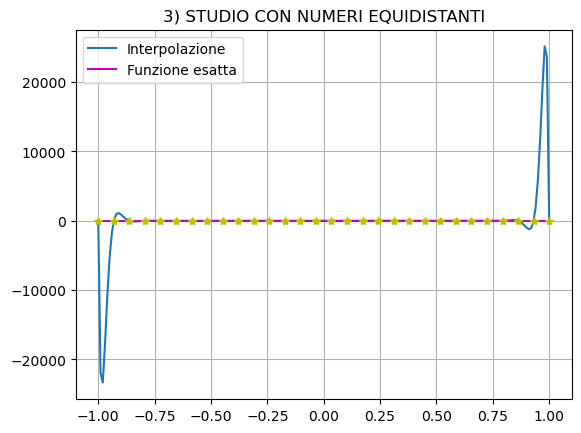

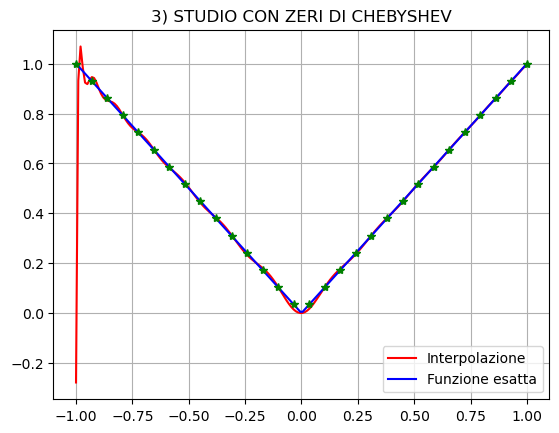

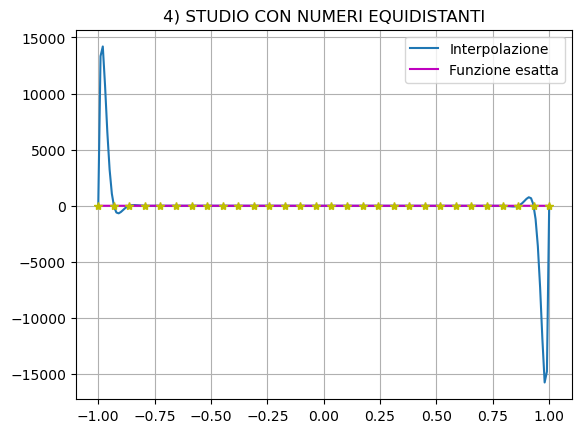

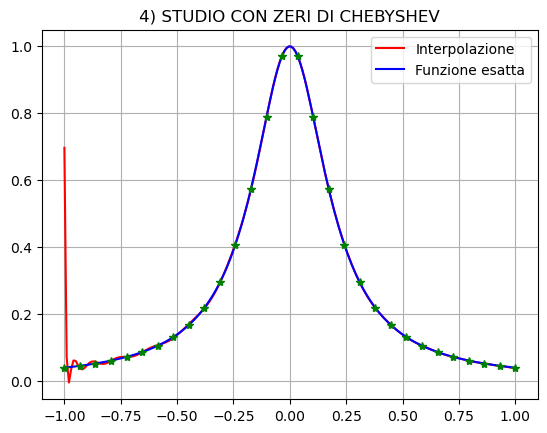

In [205]:
n = 30
N = 4

# DEFINIZIONE DEGLI INTERVALLI
ab = np.array([(-np.pi, np.pi), (-2,2),(-1,1),(-1,1)])


# CALCOLO DEI VALORI DI X:
x_eq_v = []
x_ch_v = []

for a,b in ab:
    x_eq_v.append(np.linspace(a,b,n))
    x_ch = []
    for i in range(0,n):
        xi = (a+b)/2 + ((b-a)/2)*np.cos((2*i + 1)*np.pi/(2*(n+1)))
        x_ch.append(xi)
    x_ch_v.append(x_ch)
    
x_eq_v = np.array(x_eq_v)
x_ch_v = np.array(x_ch_v)


# DEFINIZIONE DELLE FUNZIONI:
f1 = lambda x: np.sin(x) - 2*np.sin(2*x)
f2 = lambda x: np.sin(x)
f3 = lambda x: np.abs(x)
f4 = lambda x: 1/(1 + 25*x**2)
f_v = [f1,f2,f3,f4]

# POLINOMIO CALCOLATO IN PUNTI "CONTINUI" (per fare il grafico continuo e non spezzato):
xv_v = []
for a,b in ab:
    xv_v.append(np.linspace(a,b,200))
xv_v = np.array(xv_v)

polLag_ch_v = []
polLag_eq_v = []
for i in range(0,N):
    x = x_ch_v[i]
    x2 = x_eq_v[i]
    polLag_ch_v.append(Interpl(x, f_v[i](x), xv_v[i]))
    polLag_eq_v.append(Interpl(x2, f_v[i](x), xv_v[i]))
polLag_ch_v = np.array(polLag_ch_v)
polLag_eq_v = np.array(polLag_eq_v)


# POLINOMIO CALCOLATO NEI PUNTI DI INTERESSE:
xv_s_v = []
for a,b in ab:
    xv_s_v.append(np.linspace(a,b,n))
xv_s_v = np.array(xv_s_v)

polLag_ch_s_v = []
polLag_eq_s_v = []
for i in range(0,N):
    x = x_ch_v[i]
    x2 = x_eq_v[i]
    polLag_ch_s_v.append(Interpl(x, f_v[i](x), xv_s_v[i]))
    polLag_eq_s_v.append(Interpl(x2, f_v[i](x), xv_s_v[i]))
polLag_ch_s_v = np.array(polLag_ch_s_v)
polLag_eq_s_v = np.array(polLag_eq_s_v)


# CALCOLO DEGLI ERRORI:
r_ch = []
r_eq = []
for i in range(0,N):
    x = x_eq_v[i]
    x2 = x_ch_v[i]
    r_eq.append(f_v[i](x) - polLag_eq_s_v[i])
    r_ch.append(f_v[i](x2) - polLag_ch_s_v[i])
r_ch = np.array(r_ch)
r_eq = np.array(r_eq)


# STAMPA DEI GRAFICI DEGLI ERRORI:
for i in range(0,N):
    plt.plot(x_eq_v[i], np.abs(r_eq[i]))
    plt.grid(True)
    plt.title(f"{i+1}) ERRORI CON NUMERI EQUIDISTANTI")
    plt.show()
    
    plt.plot(x_ch_v[i], np.abs(r_ch[i]))
    plt.grid(True)
    plt.title(f"{i+1}) ERRORI CON ZERI DI CHEBYSHEV")
    plt.show()



# STAMPA DEI GRAFICI:
for i in range(0,N):
    plt.plot(xv_v[i], polLag_eq_v[i], '', xv_v[i], f_v[i](xv_v[i]), 'm')
    plt.plot(xv_s_v[i], f_v[i](xv_s_v[i]), 'y*')
    plt.legend(("Interpolazione", "Funzione esatta"))
    plt.grid(True)
    plt.title(f"{i+1}) STUDIO CON NUMERI EQUIDISTANTI")
    plt.show()
    
    plt.plot(xv_v[i], polLag_ch_v[i], 'r', xv_v[i], f_v[i](xv_v[i]), 'b')
    plt.plot(xv_s_v[i], f_v[i](xv_s_v[i]), 'g*')
    plt.legend(("Interpolazione","Funzione esatta"))
    plt.grid(True)
    plt.title(f"{i+1}) STUDIO CON ZERI DI CHEBYSHEV")
    plt.show()
    

# ---------------------------------------------------------------

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

# ---------------------------------------------------------------

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.
